In [1]:
from datasets import PICNN_FNLVQR_Banana
import torch

In [ ]:
synthetic_dataset = PICNN_FNLVQR_Banana()
X_train, y_train = synthetic_dataset.sample_joint(n_points=10**6)
tensor_dataset = torch.utils.data.TensorDataset(X_train, y_train)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=1024)

In [ ]:
from pushforward_operators import SchrodingerBridgeQuantile, IterativeMarkovianFittingParameters
from classes import TrainParameters

In [ ]:
quantile = SchrodingerBridgeQuantile(
    feature_dimension=1,
    response_dimension=2,
    hidden_dimension=8,
    number_of_hidden_layers=2,
)

train_parameters = TrainParameters(
    number_of_epochs_to_train=10,
    optimizer_parameters=dict(
        lr=1e-1,
    ),
    scheduler_parameters=dict(
        eta_min=0
    ),
    verbose=True
)

iterative_markovian_fitting_parameters = IterativeMarkovianFittingParameters(
    number_of_training_iterations=2000,
    number_of_markovian_projections=10,
    noise_sigma_in_sde=1.
)

In [ ]:
_ = quantile.fit(
    dataloader=dataloader,
    train_parameters=train_parameters,
    iterative_markovian_fitting_parameters=iterative_markovian_fitting_parameters
)

IMF 1 [forward] step 10000, loss 19.3538, LR 0.000000: 100%|██████████| 10000/10000 [00:29<00:00, 344.07it/s]
IMF 1 [backward] step 1089, loss 28.6888, LR 0.097102:  11%|█         | 1089/10000 [00:21<02:56, 50.59it/s]


KeyboardInterrupt: 

In [6]:
path_for_models_weights = "../attic/models/schrodinger_bridge/schrodinger_bridge_picnn_banana.pth"
quantile.save(path=path_for_models_weights)
# quantile = SchrodingerBridgeQuantile.load_class(path=path_for_models_weights).eval()

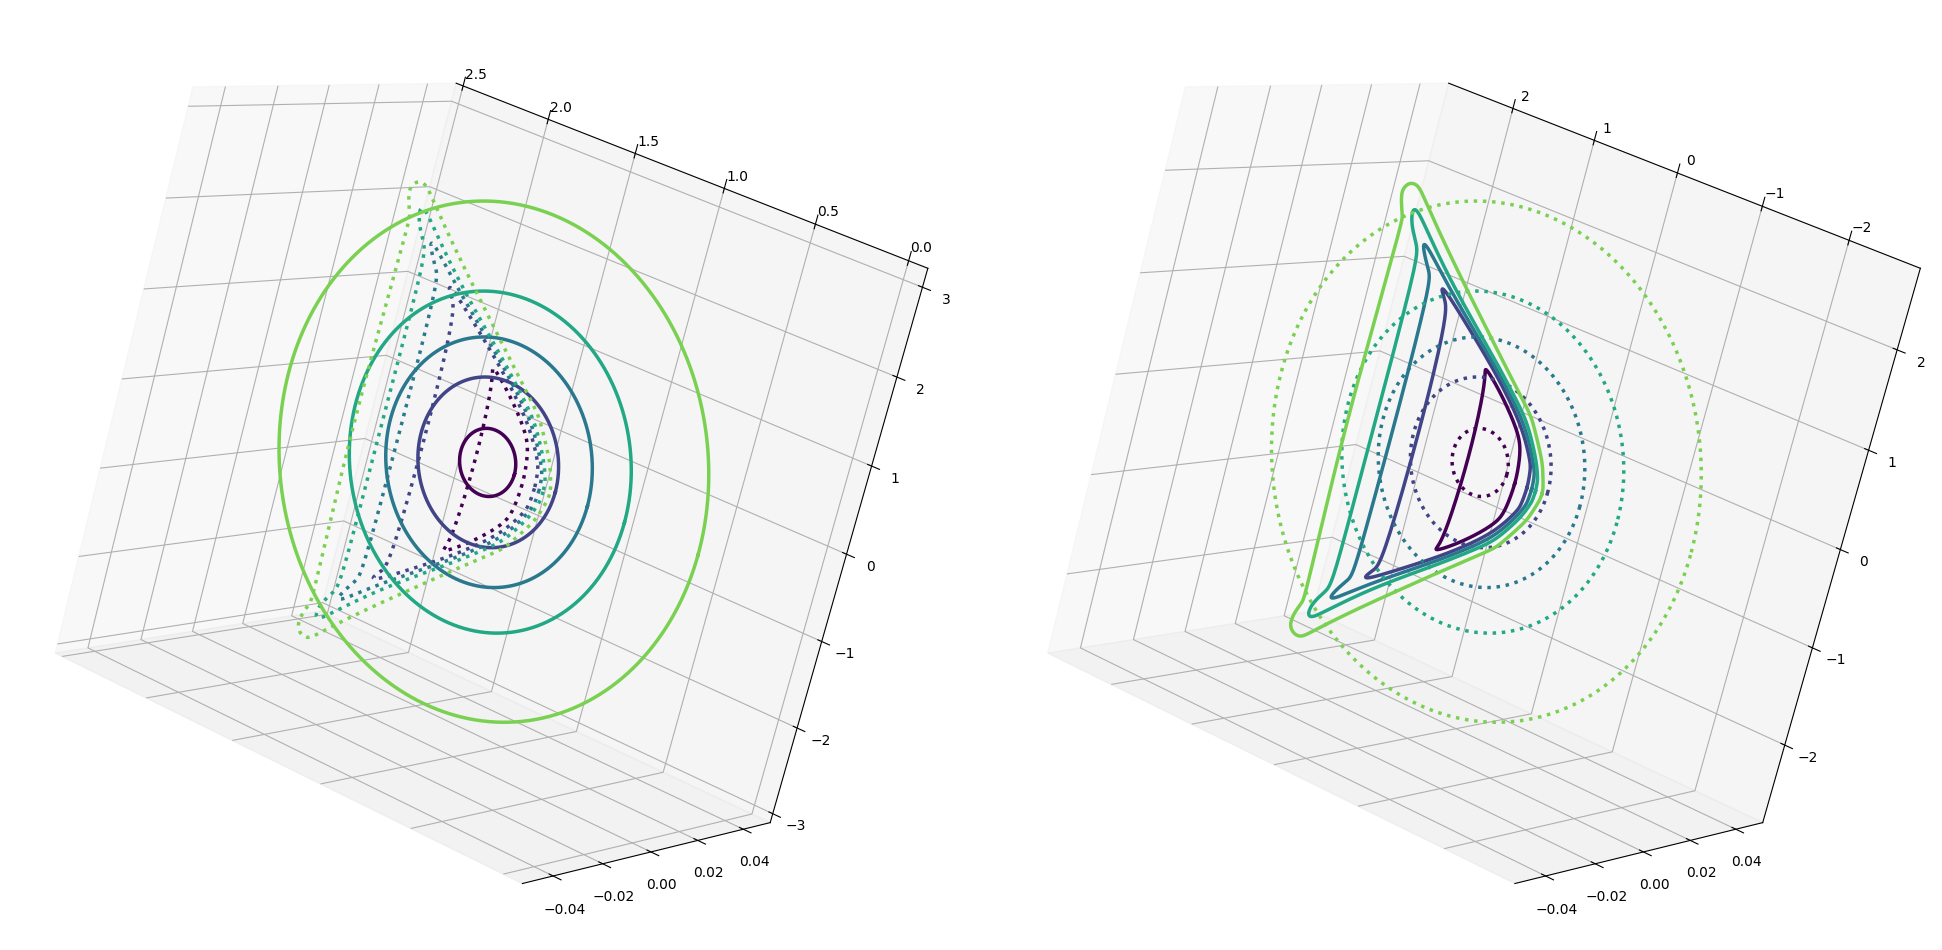

In [7]:
from utils.plot import plot_quantile_levels_from_dataset

plot_quantile_levels_from_dataset(
    model=quantile, dataset=synthetic_dataset, conditional_value=torch.Tensor([[1.2]]),
    number_of_quantile_levels=5, tensor_parameters={}
)